# Analysing US Cardiovascular Data

In [1]:
#! pip install kaggle --upgrade

## Downloading US Cardiovascular Dataset from Kaggle

In [2]:
#! kaggle datasets download -d macespinoza/mlbootcamp5

## Importing important modules and setting up parameters

In [3]:
import pandas as pd
import numpy as np

#Disable Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Plotting modules

import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline

In [4]:
# Tune in the visual settings for seaborn

sns.set_context('notebook', font_scale = 1.5,
               rc = {'figure.figsize':(11,8),
                    'axes.titlesize':18}
               )
from matplotlib import rcParams
rcParams['figure.figsize'] = 11,8

## Loading the dataset

| Feature | Variable Type | Variable | Value Type |
| --- | --- | --- |---|
|Age|	Objective Feature|	age|	int (days)|
|Height|Objective Feature|	height|	int (cm)|
|Weight |Objective Feature|	weight	|float (kg)|
|Gender	|Objective Feature	|gender	|categorical code|
|Systolic blood pressure	|Examination Feature	|ap_hi	|int|
|Diastolic blood pressure	|Examination Feature	|ap_lo	|int|
|Cholesterol	|Examination Feature	|cholesterol	|1: normal, 2: above normal, 3: well above normal|
|Glucose	|Examination Feature	|gluc	|1: normal, 2: above normal, 3: well above normal|
|Smoking	|Subjective Feature	|smoke	|binary|
|Alcohol intake	|Subjective Feature	|alco	|binary|
|Physical activity	|Subjective Feature	|active	|binary|
|Presence or absence of cardiovascular disease	|Target Variable	cardio	|binary|

## We have to figure out how many males and females are there in the dataset by analysing the data

In [5]:
df = pd.read_csv('mlbootcamp5_train.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Getting the size of the data

In [6]:
df.shape

(70000, 13)

## Analysing the categories of each feature

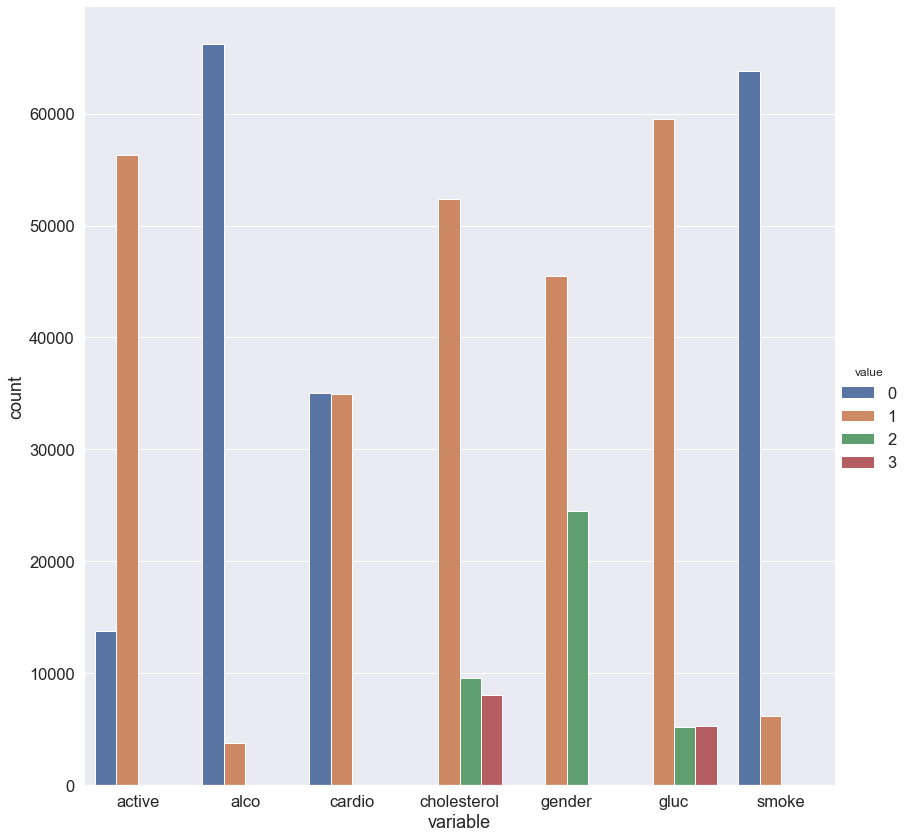

In [7]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

## Analysing the features which are leading to cardiovascular disease

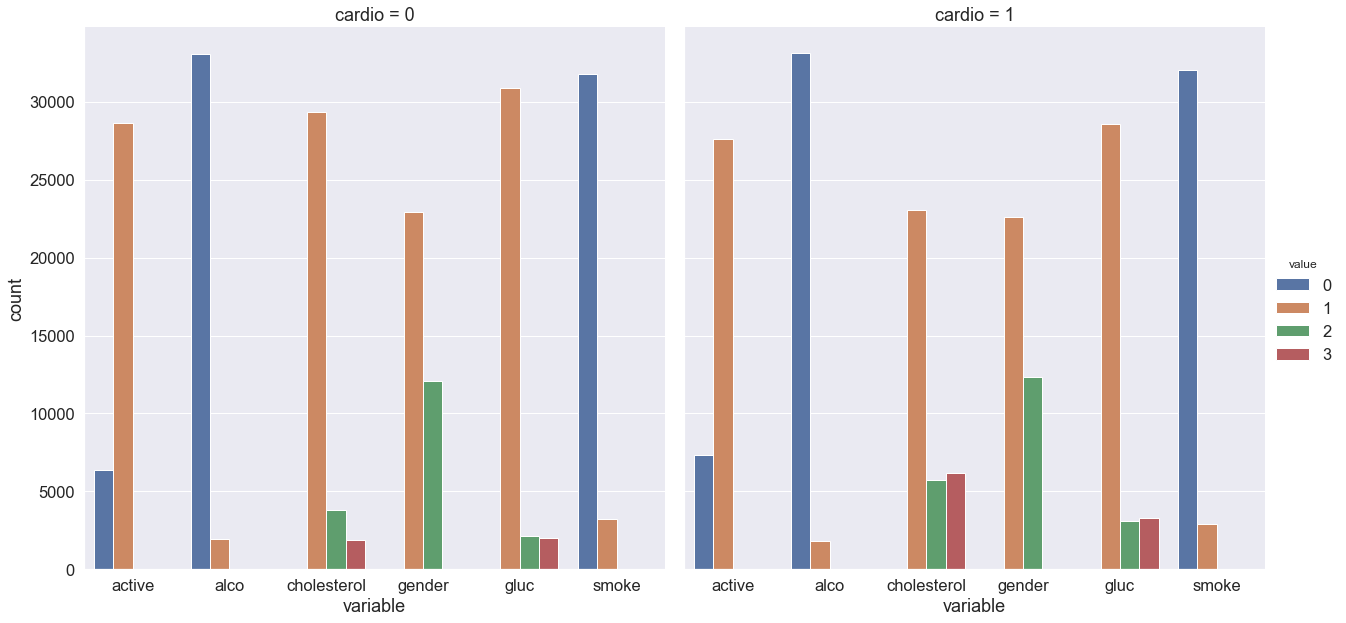

In [8]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', size=9);


## Analysing and figuring out the gender feature

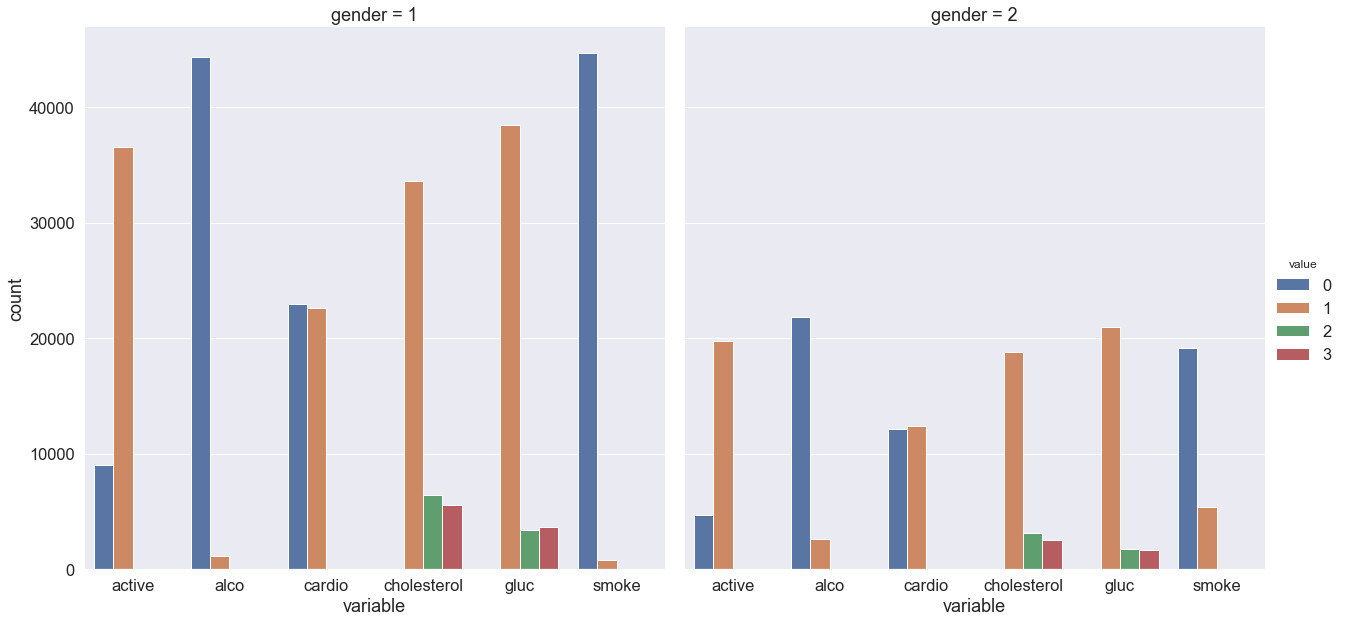

In [9]:
df_uniques = pd.melt(frame=df, value_vars=['cardio','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['gender'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'gender'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               col='gender', data=df_uniques, kind='bar', size=9);


## Getting dataframe information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Analysing unique examination and subjective features

In [11]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


## Trying to relate smoking data with gender

In [12]:
df.groupby(['gender'])['smoke'].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

## Relating Gender with height

In [13]:
df.groupby(['gender'])['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

## Figuring out the height and gender relation using violin plot


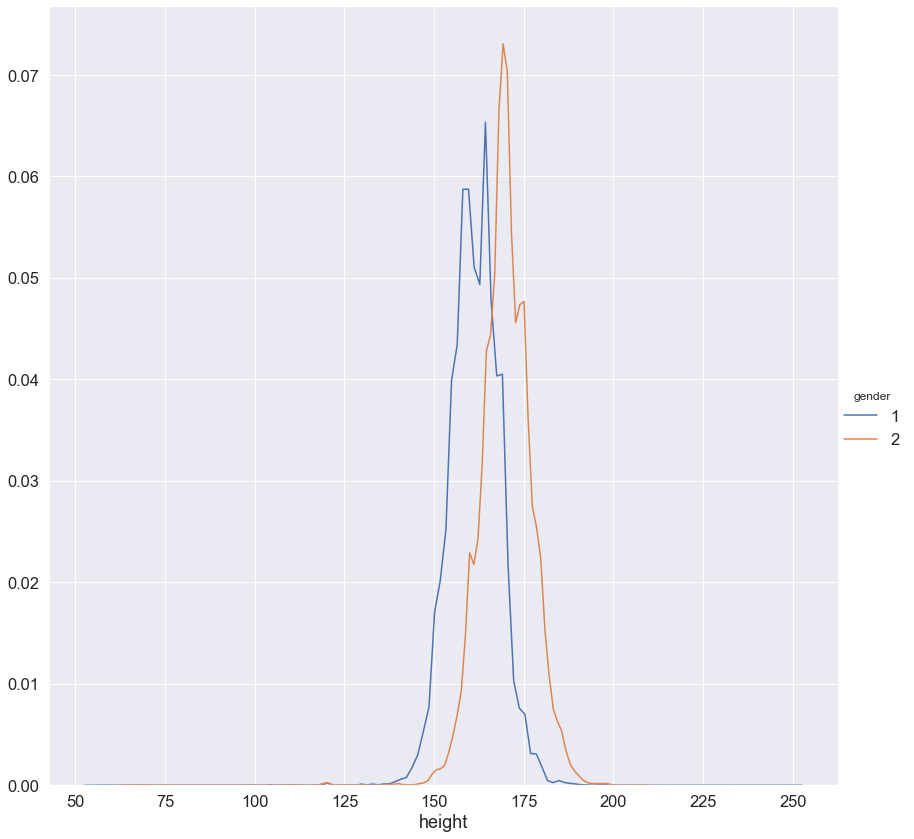

In [14]:
sns.FacetGrid(df, hue="gender", size=12) \
   .map(sns.kdeplot, "height").add_legend();

## Median Age for Smoking

In [15]:
df.groupby(['smoke'])['age'].median() / 365.25

smoke
0    53.995893
1    52.361396
Name: age, dtype: float64

In [16]:
(df[df['smoke'] == 0]['age'].median() - 
 df[df['smoke'] == 1]['age'].median()) / 365.25 * 12

19.613963039014372

## Getting full dataframe description

In [17]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Coverting Age in years

In [18]:
df['age']

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64

In [19]:
df['age_years'] = round(df['age'] / 365.25).astype(int)
df['age_years']

0        50
1        55
2        52
3        48
4        48
         ..
69995    53
69996    62
69997    52
69998    61
69999    56
Name: age_years, Length: 70000, dtype: int32

## Analysing which age group is more susceptible to cardiovascular disease

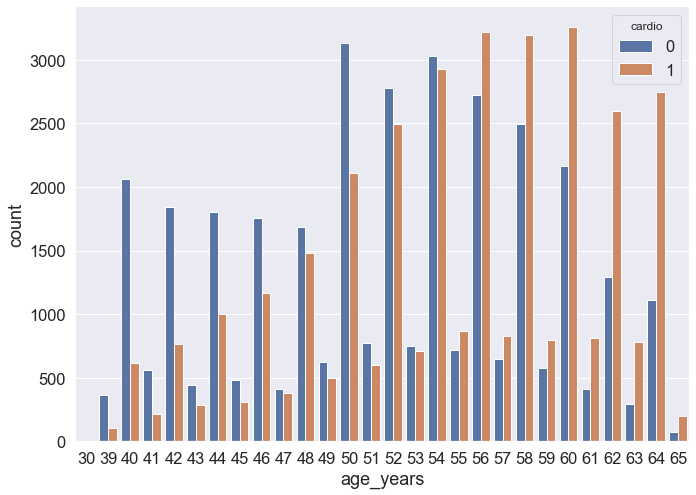

In [20]:
sns.countplot(x="age_years", hue='cardio', data=df)

## Anaysing the impact of smoking on old men causing cardiovascular diseases

In [21]:
smoking_old_man = df[(df['gender'] == 2) & (df['age_years'] >=60) & (df['age_years'] < 65) & (df['smoke'] == 1)]
less = smoking_old_man[(smoking_old_man['cholesterol'] == 1) & (smoking_old_man['ap_hi'] < 120)]['cardio'].mean()

In [22]:
more = smoking_old_man[(smoking_old_man['cholesterol'] == 3) & (smoking_old_man['ap_hi'] >=160) & \
                (smoking_old_man['ap_hi'] <180)]['cardio'].mean()

In [23]:
(more - less) / 2

0.30023923444976075

## Calculating the BMI from the given dataset and trying to know its impact on cardovascular disease

In [24]:
df['BMI'] = df['weight'] / (df['height'] / 100)**2

In [25]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177


In [26]:
df['BMI'].median()

26.374068120774975

In [27]:
df[df['gender'] == 1]['BMI'].mean()

27.98758344183312

In [28]:
df[df['gender'] == 2]['BMI'].mean()

26.754442357289474

In [29]:
df[df['cardio'] == 1]['BMI'].mean()

28.566060627015435

In [30]:
df[df['cardio'] == 0]['BMI'].mean()

26.54817520679475

In [31]:
df[(df['cardio'] == 0) & (df['alco'] == 0) & (df['gender'] == 2)]['BMI'].mean()

25.872638075460173

In [32]:
df[(df['cardio'] == 0) & (df['alco'] == 0) & (df['gender'] == 1)]['BMI'].mean()

26.845406594131518

## Filtering out irrelevant data

In [33]:
df_filtered = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]
df_filtered.shape[0] / df.shape[0] * 100.0

90.36999999999999

## Correlating each feature

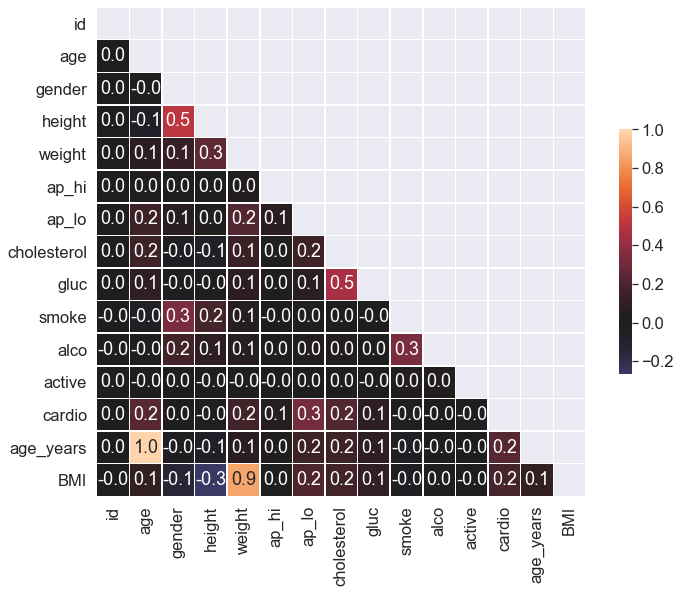

In [34]:
df = df_filtered.copy()
corr = df.corr(method = 'pearson')

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (12,9))

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',square=True,linewidth=.5,cbar_kws={'shrink':.5})

## Analysing by correlating the features to know which feature impacts on cardiovascular disease

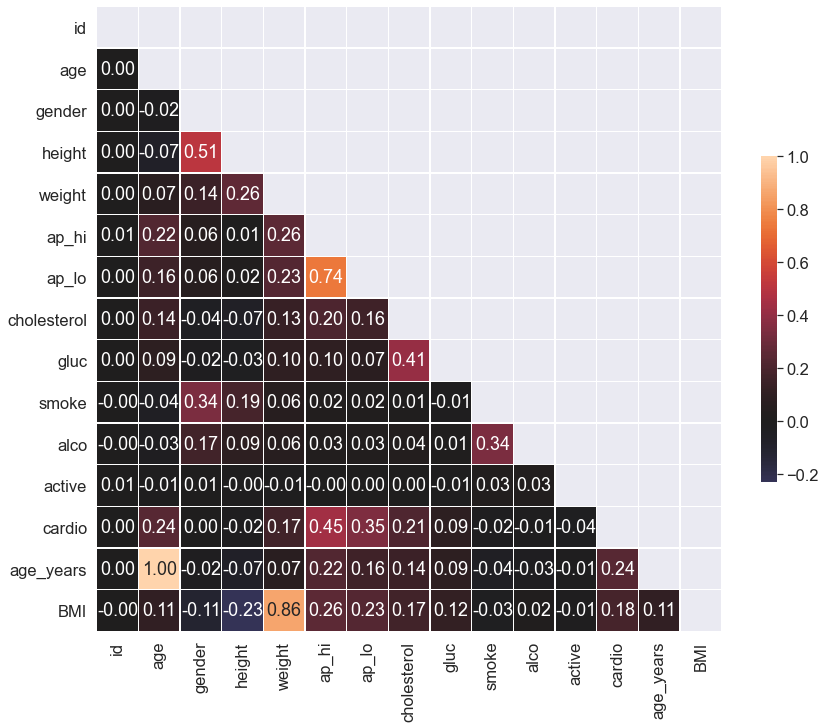

In [35]:
corr = df.corr(method = 'spearman')

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (14,12))

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',square=True,linewidth=.5,cbar_kws={'shrink':.5})